In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import researchpy as rp 
plt.rcParams['figure.figsize'] = 12,8 
plt.rcParams['font.size'] = 16 
plt.rcParams['font.size'] = 16 
plt.rcParams['font.family'] = 'sans-serif'

In [2]:
# read clean data again 
df = pd.read_csv('../data/diabetes_cleaned_data.csv')
df.head()

,Age_of_Participant,Gender,Marital_status,Education_Level,Occupation,Division,District,At_which_age_you_diagnosed_diabetes?,What_type_of_diabetes_do_you_have?,Did_you_inject_insulin_within_the_first_3_months_of_being_diagnosed_?,...,Do_you_know_about_the_role_of_Physical_activity_in_managing_your_diabetes_?,Do_you_smoke_?,Overall_health_in_the_past_4_weeks_?,Does_diabetes_affect_day_to_day_activities_?,Family_history_of_diabetes,Whether_stayed_in_hospital_overnight,Reason_for_most_recent__stay_in_hospital,Where_do__you__go_for_diabetes_check-up,Number_of_diabetes_check-ups_in_the_last__12_month,Age_Group
0,52.0,Female,Married,HSC,Housewife,Dhaka,Dhaka,36 to 50,Type 2,Probable Type 2,...,Yes,No,Good,No,Yes,No,Something else,At home,Three or more time,51-65
1,62.0,Male,Married,HSC,Retired,Dhaka,Dhaka,36 to 50,Don't know,Probable Type 2,...,Yes,No,Poor,No,Yes,Yes,Something else,At home,Three or more time,51-65
2,46.0,Male,Married,HSC,Private Service,Dhaka,Dhaka,36 to 50,Type 2,Probable Type 2,...,Yes,No,Good,Yes,No,No,Something else,At home,Three or more time,36-50
3,55.0,Female,Married,HSC,Housewife,Dhaka,Dhaka,16 to 35,Type 1,Probable Type 2,...,Yes,No,Poor,No,Yes,No,Something else,At home,Three or more time,51-65
4,64.0,Male,Married,Graduate,Private Service,Dhaka,Dhaka,36 to 50,Type 1,Probable Type 2,...,Yes,No,Good,No,Yes,No,Something else,At home,Three or more time,51-65


# Demographic Summary(Counts, Percentage) 

In [3]:
rp.codebook(df['Age_of_Participant'])

Variable: Age_of_Participant    Data Type: float64 

 Number of Obs.: 303 
 Number of missing obs.: 0 
 Percent missing: 0.0 
 Number of unique values: 50 

 Range: [20.0, 80.0] 
 Mean: 52.53 
 Standard Deviation: 10.16 
 Mode: 57.0 
 10th Percentile: 40.0 
 25th Percentile: 46.0 
 50th Percentile: 53.0 
 75th Percentile: 58.0 
 90th Percentile: 65.0 







In [4]:
# summary stats of demographics variables 
demographics_summary = rp.summary_cat(df[['Gender', 'Age_Group', 'Marital_status', 'Education_Level',
       'Occupation']]) 
# demographics_summary.to_csv('../results/demographics_summary.csv', index=False)
demographics_summary

,Variable,Outcome,Count,Percent
0,Gender,Male,211,69.64
1,,Female,92,30.36
2,Age_Group,51-65,157,51.82
3,,36-50,108,35.64
4,,66 and above,23,7.59
5,,16-35,15,4.95
6,Marital_status,Married,296,97.69
7,,Unmarried,7,2.31
8,Education_Level,"Post graduate (MSc, Ms, MD, PhD, Diploma and O...",93,30.69
9,,Graduate,76,25.08


# Estimation of probable diabetes type(Counts, Percentage)  

In [5]:
estimation = rp.summary_cat(df[['At_which_age_you_diagnosed_diabetes?',
       'What_type_of_diabetes_do_you_have?',
       'Did_you_inject_insulin_within_the_first_3_months_of_being_diagnosed_?',
       'Did_you_continue_injecting_for_more_than_one_year_after_you_first_injected_insulin?']])
# estimation.to_csv('../results/estimation_of_probable_diabetes_type.csv', index=False) 
estimation

,Variable,Outcome,Count,Percent
0,At_which_age_you_diagnosed_diabetes?,36 to 50,207,68.32
1,,16 to 35,60,19.80
2,,51-65,29,9.57
3,,66 and above,6,1.98
4,,Under 16 years,1,0.33
5,What_type_of_diabetes_do_you_have?,Type 2,127,41.91
6,,Don't know,105,34.65
7,,Type 1,71,23.43
8,Did_you_inject_insulin_within_the_first_3_mont...,Probable Type 2,235,77.56
9,,Probable Type 1,68,22.44


In [6]:
# Cross-tabulation test
pd.crosstab(df['Did_you_inject_insulin_within_the_first_3_months_of_being_diagnosed_?'], 
            df['What_type_of_diabetes_do_you_have?'], normalize=True) * 100

What_type_of_diabetes_do_you_have?,Don't know,Type 1,Type 2
Did_you_inject_insulin_within_the_first_3_months_of_being_diagnosed_?,,,
Probable Type 1,2.970297,11.221122,8.250825
Probable Type 2,31.683168,12.211221,33.663366


In [7]:
# Comparison between self-reported type with those from the c
rp.crosstab(df['Did_you_inject_insulin_within_the_first_3_months_of_being_diagnosed_?'], 
            df['What_type_of_diabetes_do_you_have?'],
           prop='cell')

What_type_of_diabetes_do_you_have?  \
What_type_of_diabetes_do_you_have?                                         Don't know   
Did_you_inject_insulin_within_the_first_3_month...                                      
Probable Type 1                                                                  2.97   
Probable Type 2                                                                 31.68   
All                                                                             34.65   

                                                                          
What_type_of_diabetes_do_you_have?                 Type 1 Type 2     All  
Did_you_inject_insulin_within_the_first_3_month...                        
Probable Type 1                                     11.22   8.25   22.44  
Probable Type 2                                     12.21  33.66   77.56  
All                                                 23.43  41.91  100.00

In [8]:
# Comparison between self-reported type with those from the derived variable
rp.crosstab(df['Did_you_continue_injecting_for_more_than_one_year_after_you_first_injected_insulin?'], 
            df['What_type_of_diabetes_do_you_have?'],
           prop='cell')

What_type_of_diabetes_do_you_have?  \
What_type_of_diabetes_do_you_have?                                         Don't know   
Did_you_continue_injecting_for_more_than_one_ye...                                      
Probable Type 1                                                                  7.26   
Probable Type 2                                                                 27.39   
All                                                                             34.65   

                                                                          
What_type_of_diabetes_do_you_have?                 Type 1 Type 2     All  
Did_you_continue_injecting_for_more_than_one_ye...                        
Probable Type 1                                      8.25  12.21   27.72  
Probable Type 2                                     15.18  29.70   72.28  
All                                                 23.43  41.91  100.00

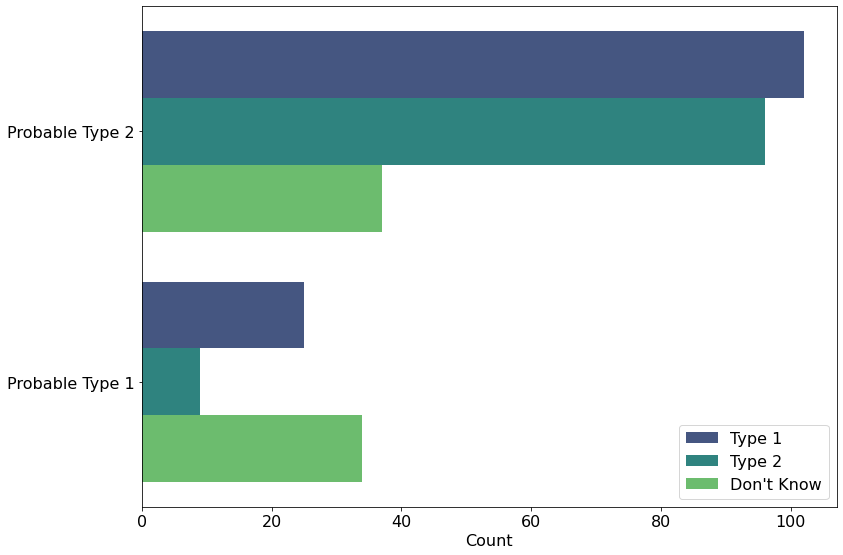

In [9]:
# Participants self-reported type of diabetes, by derived diabetes(bar chart)
sns.countplot(data=df, y='Did_you_inject_insulin_within_the_first_3_months_of_being_diagnosed_?',
              hue='What_type_of_diabetes_do_you_have?', 
             orient='h', 
             palette='viridis')
plt.xlabel("Count")
plt.ylabel('')
plt.legend(['Type 1', 'Type 2', "Don't Know"], loc='lower right')
plt.tight_layout() 
plt.savefig('../results/probable_type1.jpeg', dpi = 300)
plt.show() 

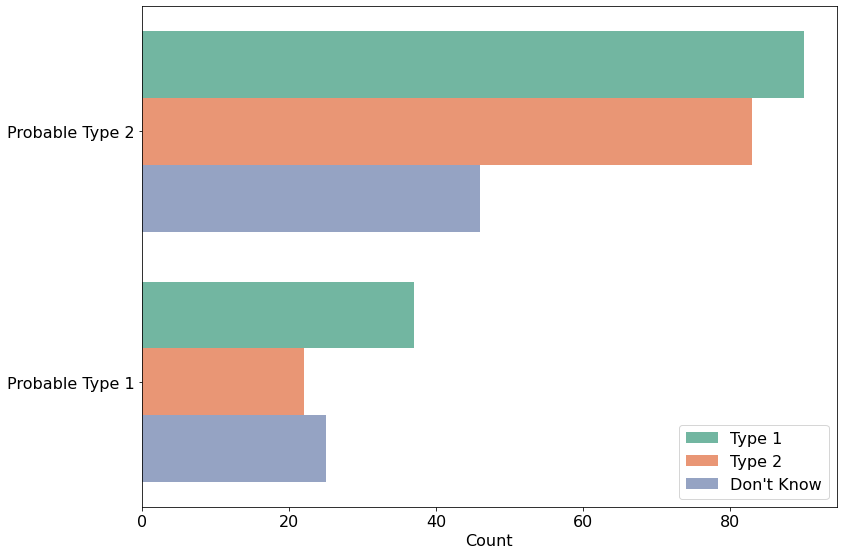

In [10]:
# Participants self-reported type of diabetes, by derived diabetes(bar chart)
sns.countplot(data=df, y='Did_you_continue_injecting_for_more_than_one_year_after_you_first_injected_insulin?',
              hue='What_type_of_diabetes_do_you_have?', 
             orient='h', 
             palette='Set2')
plt.xlabel("Count")
plt.ylabel('')
plt.legend(['Type 1', 'Type 2', "Don't Know"], loc='lower right')
plt.tight_layout() 
plt.savefig('../results/probable_type2.jpeg', dpi = 300)
plt.show() 

In [11]:
df.groupby('Did_you_inject_insulin_within_the_first_3_months_of_being_diagnosed_?')['Age_of_Participant'].mean() 

Did_you_inject_insulin_within_the_first_3_months_of_being_diagnosed_?
Probable Type 1    54.882353
Probable Type 2    51.851064
Name: Age_of_Participant, dtype: float64

In [12]:
df.groupby('Did_you_continue_injecting_for_more_than_one_year_after_you_first_injected_insulin?')['Age_of_Participant'].mean() 

Did_you_continue_injecting_for_more_than_one_year_after_you_first_injected_insulin?
Probable Type 1    54.202381
Probable Type 2    51.890411
Name: Age_of_Participant, dtype: float64

# Health Status of Diabetic Patients(Counts, Percentage)

In [13]:
health_status = rp.summary_cat(df[['Overall_health_in_the_past_4_weeks_?',
                    'Does_diabetes_affect_day_to_day_activities_?',
                   'Whether_stayed_in_hospital_overnight',
                   'Reason_for_most_recent__stay_in_hospital',
                   'Where_do__you__go_for_diabetes_check-up',
                'Number_of_diabetes_check-ups_in_the_last__12_month', 
                'Family_history_of_diabetes']])
# health_status.to_csv('../results/health_status.csv', index=False) 
health_status

,Variable,Outcome,Count,Percent
0,Overall_health_in_the_past_4_weeks_?,Good,134,44.22
1,,Fair,94,31.02
2,,Very good,46,15.18
3,,Poor,27,8.91
4,,Excellent,2,0.66
5,Does_diabetes_affect_day_to_day_activities_?,Yes,165,54.46
6,,No,138,45.54
7,Whether_stayed_in_hospital_overnight,No,169,55.78
8,,Yes,134,44.22
9,Reason_for_most_recent__stay_in_hospital,Something else,133,43.89


In [14]:
rp.crosstab(df['Does_diabetes_affect_day_to_day_activities_?'], 
            df['What_type_of_diabetes_do_you_have?'], prop='cell')

What_type_of_diabetes_do_you_have?  \
What_type_of_diabetes_do_you_have?                                   Don't know   
Does_diabetes_affect_day_to_day_activities_?                                      
No                                                                        22.44   
Yes                                                                       12.21   
All                                                                       34.65   

                                                                    
What_type_of_diabetes_do_you_have?           Type 1 Type 2     All  
Does_diabetes_affect_day_to_day_activities_?                        
No                                             8.58  14.52   45.54  
Yes                                           14.85  27.39   54.46  
All                                           23.43  41.91  100.00

In [15]:
rp.crosstab(df['Overall_health_in_the_past_4_weeks_?'], 
            df['What_type_of_diabetes_do_you_have?'], prop='cell')

What_type_of_diabetes_do_you_have?  \
What_type_of_diabetes_do_you_have?                           Don't know   
Overall_health_in_the_past_4_weeks_?                                      
Excellent                                                          0.66   
Fair                                                               5.61   
Good                                                              16.50   
Poor                                                               3.30   
Very good                                                          8.58   
All                                                               34.65   

                                                            
What_type_of_diabetes_do_you_have?   Type 1 Type 2     All  
Overall_health_in_the_past_4_weeks_?                        
Excellent                              0.00   0.00    0.66  
Fair                                   9.57  15.84   31.02  
Good                                  10.56  17.16   44.22  
Poor                                   1.65   3.96    8.91  
Very good                              1.65   4.95   15.18  
All                                   23.43  41.91  100.00

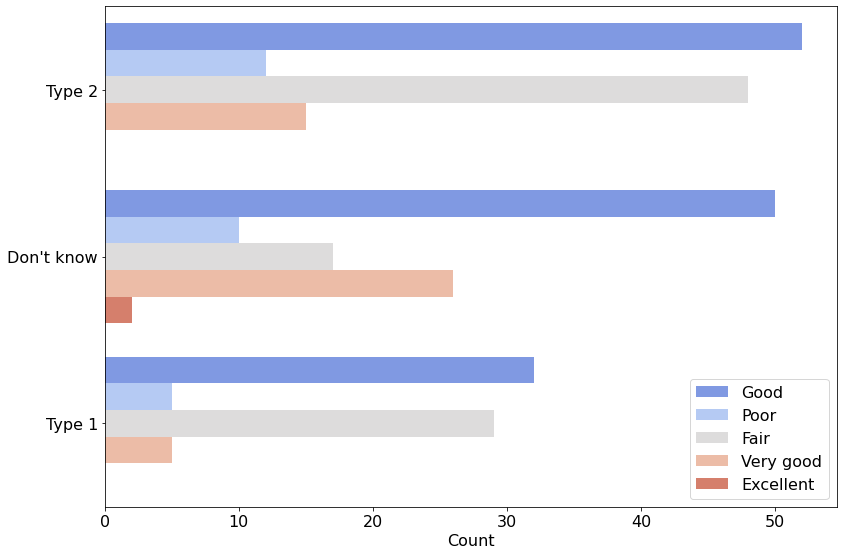

In [16]:
# self-reported health status, by diabetes type and age
sns.countplot(data=df, 
              hue='Overall_health_in_the_past_4_weeks_?',
              y='What_type_of_diabetes_do_you_have?', 
             orient='h', 
             palette='coolwarm')
plt.xlabel("Count")
plt.ylabel('')
plt.legend(loc='lower right')
plt.tight_layout() 
plt.savefig('../results/self-reported_health_status_by_diabetes_type.jpeg', dpi = 300)
plt.show() 

In [17]:
rp.crosstab(df['Does_diabetes_affect_day_to_day_activities_?'], 
            df['At_which_age_you_diagnosed_diabetes?'], prop='cell')

At_which_age_you_diagnosed_diabetes?  \
At_which_age_you_diagnosed_diabetes?                                     16 to 35   
Does_diabetes_affect_day_to_day_activities_?                                        
No                                                                          10.89   
Yes                                                                          8.91   
All                                                                         19.80   

                                                                           \
At_which_age_you_diagnosed_diabetes?         36 to 50 51-65 66  and above   
Does_diabetes_affect_day_to_day_activities_?                                
No                                              28.05  5.28          0.99   
Yes                                             40.26  4.29          0.99   
All                                             68.32  9.57          1.98   

                                                                     
At_which_age_you_diagnosed_diabetes?         Under 16 years     All  
Does_diabetes_affect_day_to_day_activities_?                         
No                                                     0.33   45.54  
Yes                                                    0.00   54.46  
All                                                    0.33  100.00

In [18]:
rp.crosstab(df['Overall_health_in_the_past_4_weeks_?'], 
            df['At_which_age_you_diagnosed_diabetes?'], prop='cell')

At_which_age_you_diagnosed_diabetes?  \
At_which_age_you_diagnosed_diabetes?                             16 to 35   
Overall_health_in_the_past_4_weeks_?                                        
Excellent                                                            0.33   
Fair                                                                 4.62   
Good                                                                 9.90   
Poor                                                                 0.66   
Very good                                                            4.29   
All                                                                 19.80   

                                                                   \
At_which_age_you_diagnosed_diabetes? 36 to 50 51-65 66  and above   
Overall_health_in_the_past_4_weeks_?                                
Excellent                                0.33  0.00          0.00   
Fair                                    24.09  2.31          0.00   
Good                                    29.04  3.63          1.32   
Poor                                     5.94  1.98          0.33   
Very good                                8.91  1.65          0.33   
All                                     68.32  9.57          1.98   

                                                             
At_which_age_you_diagnosed_diabetes? Under 16 years     All  
Overall_health_in_the_past_4_weeks_?                         
Excellent                                      0.00    0.66  
Fair                                           0.00   31.02  
Good                                           0.33   44.22  
Poor                                           0.00    8.91  
Very good                                      0.00   15.18  
All                                            0.33  100.00

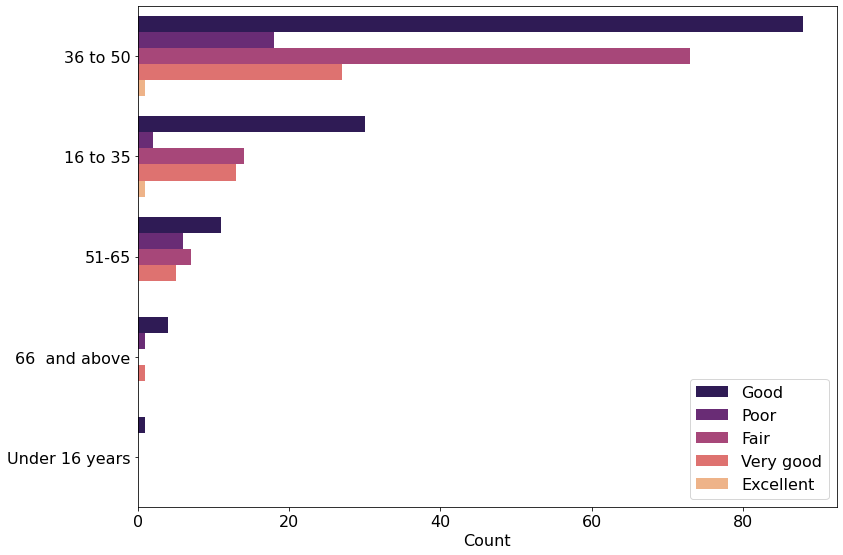

In [19]:
# self-reported health status, by diabetes type and age
sns.countplot(data=df, 
              hue='Overall_health_in_the_past_4_weeks_?',
              y='At_which_age_you_diagnosed_diabetes?', 
             orient='h', 
             palette='magma')
plt.xlabel("Count")
plt.ylabel('')
plt.legend(loc='lower right')
plt.tight_layout() 
plt.savefig('../results/self-reported_health_status_by_age.jpeg', dpi = 300)
plt.show() 

# Self Management of Diabetes(Counts, Percentage)

In [21]:
df[]

0      Yes
1      Yes
2      Yes
3      Yes
4      Yes
      ... 
298    Yes
299    Yes
300    Yes
301    Yes
302    Yes
Name: Do_you_take_any_medication_for_any_other_condition_?, Length: 303, dtype: object

In [22]:
self_management_results = rp.summary_cat(df[['How_do_you_control_your_diabetes_now_?',
                   'Do_you_take_any_medication_for_any_other_condition_?',
                   'What_type_of_medication_do_you_take_?',
                   'How_often_do_you_test_your_own_blood_glucose_level_?', 
                   'Do_you_take_any_medication_for_any_other_condition_?']])
# self_management_results.to_csv('../results/self_management_results.csv', index=False) 
self_management_results

,Variable,Outcome,Count,Percent
0,How_do_you_control_your_diabetes_now_?,Tablets,49,16.17
1,,"Tablets, Diet",49,16.17
2,,"Diet, Physical activity",35,11.55
3,,"Tablets, Physical activity",27,8.91
4,,"Tablets, Diet, Physical activity",23,7.59
5,,Insulin,15,4.95
6,,"Insulin, Diet",10,3.30
7,,"Insulin, Diet, Physical activity",10,3.30
8,,"Insulin, Tablets",10,3.30
9,,"Insulin, Physical activity",10,3.30


# Knowledge of Partcipants regarding diabetes   

In [23]:
knowledge_status = rp.summary_cat(df[[
       'Do_you_know_enough_about_when_to_take_your_medication_?',
       'Do_you_know_enough_about_what_you_should_eat_to_help_you_manage_your_diabetes_?',
       'Do_you_know_about_the_role_of_Physical_activity_in_managing_your_diabetes_?',
       'Do_you_smoke_?']])
# knowledge_status.to_csv('../results/knowledge_status.csv', index=False) 
knowledge_status

,Variable,Outcome,Count,Percent
0,Do_you_know_enough_about_when_to_take_your_med...,Yes,258,85.15
1,,I would like to know,34,11.22
2,,No,11,3.63
3,Do_you_know_enough_about_what_you_should_eat_t...,Yes,267,88.12
4,,I would like to Know,26,8.58
5,,No,10,3.30
6,Do_you_know_about_the_role_of_Physical_activit...,Yes,270,89.11
7,,I would like to Know,20,6.60
8,,No,13,4.29
9,Do_you_smoke_?,No,197,65.02
